In [1]:
#Step-1 Importng Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [3]:
#Step-2 Load data
df=pd.read_csv('/content/drive/MyDrive/Dataset/House_Rent_Dataset.csv')
df

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [4]:
#Step-3 See Data
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In Given Dataset we have a column "Floor", Let's Divide this column in 2 parts, 1 will say about Floor Number and another will tell about total number of floor

In [5]:
#Step-4 Diving Column "Floor" --> "Floor_Number"
df["Floor_Number"]=df["Floor"].apply(lambda x:str(x).split()[0])

In [6]:
#Step-5 Diving Column "Floor" --> Total_Number_of_Floor
df["Total_Number_of_Floor"]=df["Floor"].apply(lambda x:str(x).split()[-1])

In [7]:
#Step-6 Check NaN
df.isnull().sum()

Posted On                0
BHK                      0
Rent                     0
Size                     0
Floor                    0
Area Type                0
Area Locality            0
City                     0
Furnishing Status        0
Tenant Preferred         0
Bathroom                 0
Point of Contact         0
Floor_Number             0
Total_Number_of_Floor    0
dtype: int64

In [8]:
#Step-7 Info about Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Posted On              4746 non-null   object
 1   BHK                    4746 non-null   int64 
 2   Rent                   4746 non-null   int64 
 3   Size                   4746 non-null   int64 
 4   Floor                  4746 non-null   object
 5   Area Type              4746 non-null   object
 6   Area Locality          4746 non-null   object
 7   City                   4746 non-null   object
 8   Furnishing Status      4746 non-null   object
 9   Tenant Preferred       4746 non-null   object
 10  Bathroom               4746 non-null   int64 
 11  Point of Contact       4746 non-null   object
 12  Floor_Number           4746 non-null   object
 13  Total_Number_of_Floor  4746 non-null   object
dtypes: int64(4), object(10)
memory usage: 519.2+ KB


In [9]:
#Step-8 Removing Unwanted Cloumns
df.drop(["Posted On", "Floor", "Area Locality", "Tenant Preferred"], axis="columns", inplace=True)

In [10]:
#Step-9 See Data
df.head()

,BHK,Rent,Size,Area Type,City,Furnishing Status,Bathroom,Point of Contact,Floor_Number,Total_Number_of_Floor
0,2,10000,1100,Super Area,Kolkata,Unfurnished,2,Contact Owner,Ground,2
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,1,Contact Owner,1,3
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,1,Contact Owner,1,3
3,2,10000,800,Super Area,Kolkata,Unfurnished,1,Contact Owner,1,2
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,1,Contact Owner,1,2


Now We See "Ground" in "Floor_Number" Column, let's check Ground is writeen in First record only or other records too.

In [11]:
#Step-10 Check Data
x=df["Floor_Number"]=="Ground"

In [12]:
#Step-11 in Countinuation to Step-10
df[x]

,BHK,Rent,Size,Area Type,City,Furnishing Status,Bathroom,Point of Contact,Floor_Number,Total_Number_of_Floor
0,2,10000,1100,Super Area,Kolkata,Unfurnished,2,Contact Owner,Ground,2
5,2,7000,600,Super Area,Kolkata,Unfurnished,2,Contact Owner,Ground,1
6,2,10000,700,Super Area,Kolkata,Unfurnished,2,Contact Agent,Ground,4
14,3,8500,900,Carpet Area,Kolkata,Unfurnished,2,Contact Owner,Ground,2
17,2,10000,800,Super Area,Kolkata,Unfurnished,1,Contact Owner,Ground,2
...,...,...,...,...,...,...,...,...,...,...
4721,1,5500,40,Super Area,Hyderabad,Unfurnished,1,Contact Owner,Ground,2
4722,1,8000,850,Super Area,Hyderabad,Unfurnished,1,Contact Owner,Ground,3
4729,2,13000,1500,Carpet Area,Hyderabad,Unfurnished,2,Contact Owner,Ground,1
4732,2,7000,900,Super Area,Hyderabad,Unfurnished,1,Contact Owner,Ground,2


Now We will convert Ground as 0, as 0 is Ground Floor, 1 is 1st Floor etc.

In [13]:
#Step-12 Replacing Ground --> 0 [Zero]
def fun(c):
    return c.replace("Ground","0")

In [14]:
clm=["Floor_Number"]

In [15]:
for c in clm:
    df[c]=df[c].apply(fun)


In [16]:
#Step-13 Check data of Column - "Floor_Number"
df["Floor_Number"].value_counts()

1        1161
2         945
0         927
3         512
4         272
5         164
6          93
7          74
10         67
8          66
9          65
12         47
11         43
15         41
14         34
18         26
Upper      23
17         22
16         21
19         16
13         15
20         12
25         12
Lower      11
23          9
24          6
21          6
30          5
34          4
28          4
35          3
65          3
22          3
26          3
32          3
60          3
27          3
40          2
53          2
45          2
36          2
48          2
29          1
49          1
50          1
39          1
46          1
41          1
44          1
33          1
37          1
47          1
43          1
76          1
Name: Floor_Number, dtype: int64

Here We See, "Upper" and "Lower" also as String, Lets replace Lower by 1, Upper Will be Number of Floor

In [17]:
#Step-14 Replacing "Lower" --> 1 in Cloumn- "Floor_Number"
def fun2(v):
    return v.replace("Lower", "1")

In [18]:
for v in clm:
    df[v]=df[v].apply(fun2)

In [19]:
#Step-15, Replacing "Upper"--> Total Floor in Cloumn "Floor_Number"
def fun3(b):
    return b

In [20]:
df["Floor_Number"]=df["Total_Number_of_Floor"].apply(fun3)

In [21]:
#Step-16 Again Checking Data
df.head(100)

,BHK,Rent,Size,Area Type,City,Furnishing Status,Bathroom,Point of Contact,Floor_Number,Total_Number_of_Floor
0,2,10000,1100,Super Area,Kolkata,Unfurnished,2,Contact Owner,2,2
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,1,Contact Owner,3,3
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,1,Contact Owner,3,3
3,2,10000,800,Super Area,Kolkata,Unfurnished,1,Contact Owner,2,2
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,1,Contact Owner,2,2
...,...,...,...,...,...,...,...,...,...,...
95,1,5000,300,Carpet Area,Kolkata,Unfurnished,1,Contact Owner,2,2
96,2,12000,1200,Super Area,Kolkata,Furnished,2,Contact Owner,3,3
97,2,10000,500,Carpet Area,Kolkata,Semi-Furnished,1,Contact Owner,4,4
98,4,18000,1200,Super Area,Kolkata,Unfurnished,2,Contact Owner,2,2


In [22]:
df.tail(100)

,BHK,Rent,Size,Area Type,City,Furnishing Status,Bathroom,Point of Contact,Floor_Number,Total_Number_of_Floor
4646,2,14500,1100,Super Area,Hyderabad,Semi-Furnished,2,Contact Owner,5,5
4647,1,8000,450,Super Area,Hyderabad,Unfurnished,1,Contact Owner,3,3
4648,6,80000,4500,Super Area,Hyderabad,Semi-Furnished,6,Contact Owner,2,2
4649,2,15000,1300,Carpet Area,Hyderabad,Semi-Furnished,2,Contact Owner,4,4
4650,1,15500,1000,Carpet Area,Hyderabad,Semi-Furnished,1,Contact Owner,5,5
...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,Carpet Area,Hyderabad,Semi-Furnished,2,Contact Owner,5,5
4742,3,29000,2000,Super Area,Hyderabad,Semi-Furnished,3,Contact Owner,4,4
4743,3,35000,1750,Carpet Area,Hyderabad,Semi-Furnished,3,Contact Agent,5,5
4744,3,45000,1500,Carpet Area,Hyderabad,Semi-Furnished,2,Contact Agent,34,34


In [23]:
#Step-13 Check data of Column - "Floor_Number"
df["Floor_Number"].value_counts()

4         938
3         915
2         868
5         422
1         335
         ... 
39          1
62          1
59          1
66          1
Ground      1
Name: Floor_Number, Length: 67, dtype: int64

In [24]:
for c in clm:
  df[c]=df[c].apply(fun)

In [25]:
#Step-13 Check data of Column - "Floor_Number"
df["Floor_Number"].value_counts()

4     938
3     915
2     868
5     422
1     335
     ... 
39      1
62      1
59      1
66      1
0       1
Name: Floor_Number, Length: 67, dtype: int64

In [26]:
#Step-17 Converting Datatype of Column "Floor_Number" --> int
df["Floor_Number"]=df["Floor_Number"].astype(int)

Noe lets check data of cloumn- "Total_Number_of_Floor"

In [27]:
df["Total_Number_of_Floor"].value_counts()

4         938
3         915
2         868
5         422
1         335
         ... 
39          1
62          1
59          1
66          1
Ground      1
Name: Total_Number_of_Floor, Length: 67, dtype: int64

Here We see one Record as "Ground", Let's replace it by 0

In [28]:
#Step-18 Replacing "Ground"--> 0
clm1=["Total_Number_of_Floor"]

In [29]:
for c in clm1:
    df[c]=df[c].apply(fun)

In [30]:
#Step-19 Converting datatype of Column "Total_Number_of_Floor"--> int
df["Total_Number_of_Floor"]=df["Total_Number_of_Floor"].astype(int)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   BHK                    4746 non-null   int64 
 1   Rent                   4746 non-null   int64 
 2   Size                   4746 non-null   int64 
 3   Area Type              4746 non-null   object
 4   City                   4746 non-null   object
 5   Furnishing Status      4746 non-null   object
 6   Bathroom               4746 non-null   int64 
 7   Point of Contact       4746 non-null   object
 8   Floor_Number           4746 non-null   int64 
 9   Total_Number_of_Floor  4746 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 370.9+ KB


Removing Unwanted Columns

In [32]:
# #Step-20 Removing Unwanted Columns
df.drop(["Area Type"], axis="columns", inplace=True)

In [33]:
#Step-21 Lable Encoding - Converting String -- Numeric
clms=["City", "Furnishing Status", "Point of Contact"]

In [34]:
le=preprocessing.LabelEncoder()
for n in clms:
    df[n]=le.fit_transform(df[n])

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   BHK                    4746 non-null   int64
 1   Rent                   4746 non-null   int64
 2   Size                   4746 non-null   int64
 3   City                   4746 non-null   int64
 4   Furnishing Status      4746 non-null   int64
 5   Bathroom               4746 non-null   int64
 6   Point of Contact       4746 non-null   int64
 7   Floor_Number           4746 non-null   int64
 8   Total_Number_of_Floor  4746 non-null   int64
dtypes: int64(9)
memory usage: 333.8 KB


In [36]:
#Step-22 Split data for Dependent and Independent variable (X and Y)
x=df.drop("Rent", axis="columns")

In [37]:
y=df["Rent"]

In [38]:
#Step-23 applying
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.80, random_state=42)

In [39]:
#Step-24- Model
model = LinearRegression()
#Step-25 Train Model
model.fit(xtrain, ytrain)

LinearRegression()

In [40]:
#Step-25 Check Score
model.score(xtest,ytest)

0.4787267094563272

In [41]:
preds = model.predict(xtest)

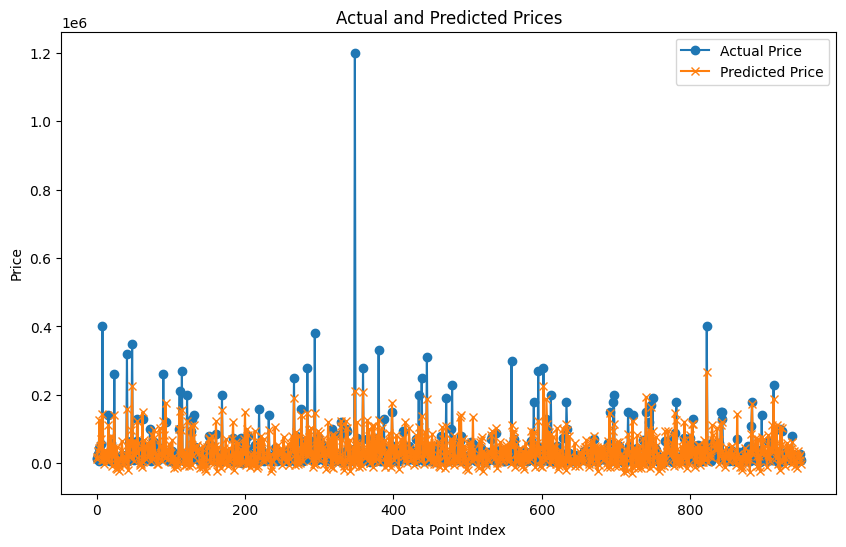

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have ytest and preds from your linear regression model

plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(ytest)), ytest, label='Actual Price', marker='o')
plt.plot(np.arange(len(preds)), preds, label='Predicted Price', marker='x')
plt.xlabel('Data Point Index')
plt.ylabel('Price')
plt.title('Actual and Predicted Prices')
plt.legend()
plt.show()


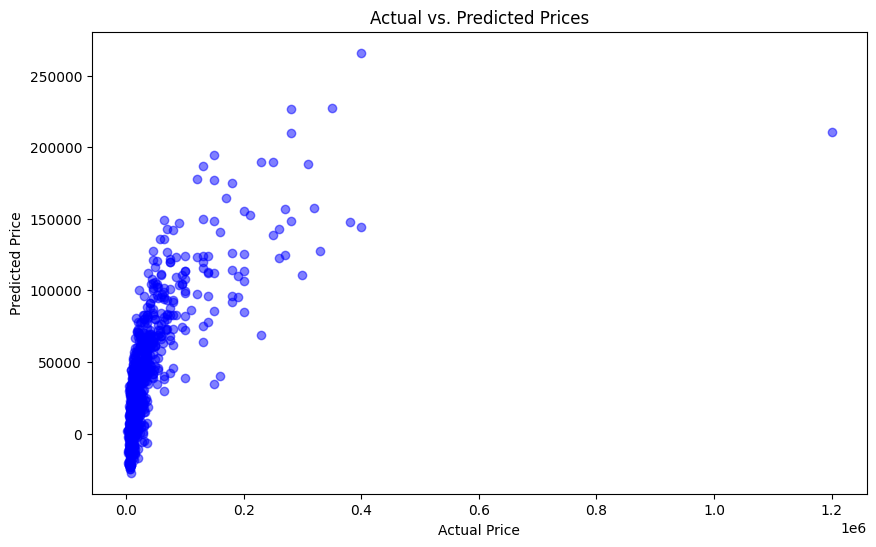

In [43]:
import matplotlib.pyplot as plt

# Assuming you have ytest and preds from your linear regression model

plt.figure(figsize=(10, 6))
plt.scatter(ytest, preds, color='blue', alpha=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Prices')
plt.show()


In [44]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

dt = DecisionTreeRegressor()
dt.fit(xtrain, ytrain)
preds = dt.predict(xtest)
print('DecisionTreeRegressor: ',r2_score(ytest, preds))

DecisionTreeRegressor:  0.6142214982995656


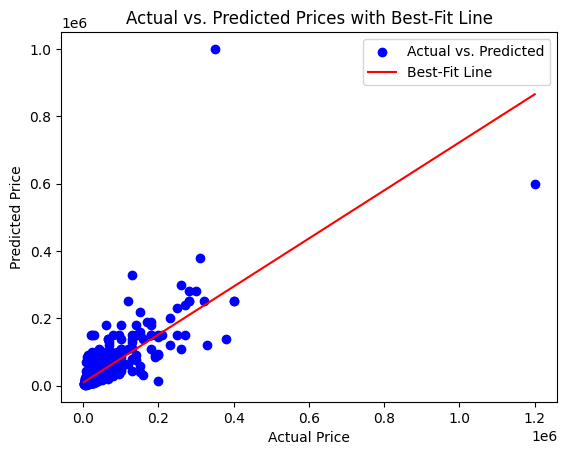

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have ytest and y_pred from your linear regression model

# Create a scatter plot of actual vs. predicted values
plt.scatter(ytest, preds, color='blue', label='Actual vs. Predicted')

# Add a best-fit line (regression line)
plt.plot(np.unique(ytest), np.poly1d(np.polyfit(ytest, preds, 1))(np.unique(ytest)), color='red', label='Best-Fit Line')

plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Prices with Best-Fit Line')
plt.legend()
plt.show()

In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load and preprocess your data, split it into features (X) and target (y)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Regressor model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 1188799856.5357363
R-squared: 0.7017098837159839


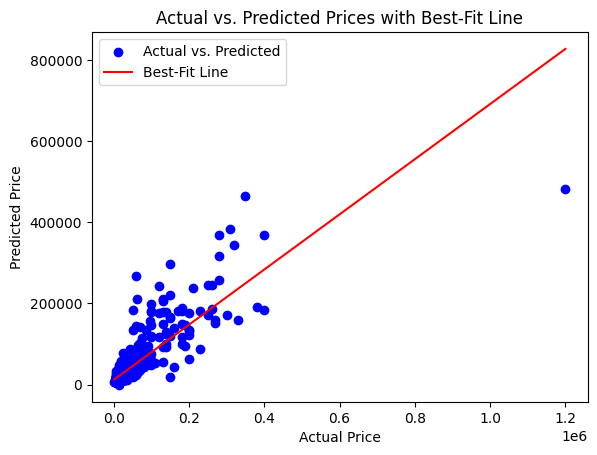

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have ytest and y_pred from your linear regression model

# Create a scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')

# Add a best-fit line (regression line)
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_pred, 1))(np.unique(y_test)), color='red', label='Best-Fit Line')

plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Prices with Best-Fit Line')
plt.legend()
plt.show()

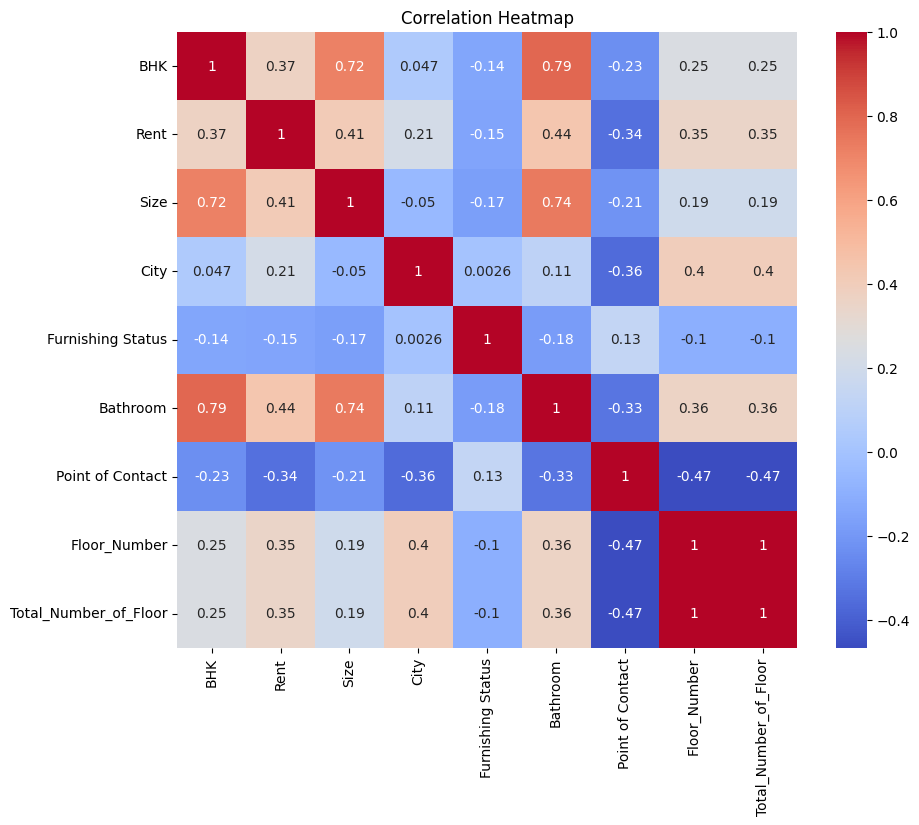

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
